<a href="https://colab.research.google.com/github/SergiuTULUC/Projekt-Klasifikace/blob/main/Kopie_se%C5%A1itu_%C5%A0ablona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cd0f24bf9b6fd2b0abb82d76f7dfd418a503925ee873dfd453e89483096cb84d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
pip install lazypredict

In [ ]:
# preprocessing a analýza dat
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# modely
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyClassifier
# metriky
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve
# plot
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

# Příprava dat

In [ ]:
# konstanty -> přepínače, jestli chci nebo nechci provést akci
# např. spustit pandas profiling -> vytvořit okýnko s explorativní analýzou
DATA_REPORT = False
# nebo jestli chci použít všechna data nebo udělat vzorek
VZOREK_DAT = True
VELIKOST_VZORKU = 10000
# vybrat feautury podle výsledků korelace?
APLIKOVAT_KORELACI = False
TRESHOLD = 0.2
# chci upscalovat méně početnou třídu?
SMOTE_UPSCALING = True

### Načíst data

In [ ]:
data = pd.read_csv("loan_data.csv")
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.00,female,Master,71948.00,0,RENT,35000.00,PERSONAL,16.02,0.49,3.00,561,No,1
1,21.00,female,High School,12282.00,0,OWN,1000.00,EDUCATION,11.14,0.08,2.00,504,Yes,0
2,25.00,female,High School,12438.00,3,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3.00,635,No,1
3,23.00,female,Bachelor,79753.00,0,RENT,35000.00,MEDICAL,15.23,0.44,2.00,675,No,1
4,24.00,male,Master,66135.00,1,RENT,35000.00,MEDICAL,14.27,0.53,4.00,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.00,male,Associate,47971.00,6,RENT,15000.00,MEDICAL,15.66,0.31,3.00,645,No,1
44996,37.00,female,Associate,65800.00,17,RENT,9000.00,HOMEIMPROVEMENT,14.07,0.14,11.00,621,No,1
44997,33.00,male,Associate,56942.00,7,RENT,2771.00,DEBTCONSOLIDATION,10.02,0.05,10.00,668,No,1
44998,29.00,male,Bachelor,33164.00,4,RENT,12000.00,EDUCATION,13.23,0.36,6.00,604,No,1


### Explorativní analýza

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [ ]:
data.describe(include="object")

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [ ]:
if DATA_REPORT:
  profile = ProfileReport(data)
  profile.to_notebook_iframe()

- podezřelé hodnoty -> např. věk 144 let
- chybějící data -> nemusím řešit
- převody datových typů - ano
- feature engineering - na vás
- škálování - ano
- rozdělení train/test

### Outliery

In [ ]:
# v reálném světě, bychom se ptali "data owner" -> jestli to je reálný záznam nebo chyba / outlier
# předpokládáme, že to je chyba, a řešíme např. klienty jen do 100 let
data = data[data["person_age"] < 100]

### Datové typy - one hot encoding vs ordinal encoding

In [ ]:
# textové sloupce
data.describe(include="object")

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,44993,44993,44993,44993,44993
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24836,13396,23440,9151,22856


In [ ]:
# gender -> binární -> jednoduše převedeme na 0 a 1
encoding_pohlavi = {"male": 1, "female": 0}
data["person_gender"] = data["person_gender"].apply(lambda pohlavi: encoding_pohlavi[pohlavi])

In [ ]:
# vzdělání dokážeme seřadit -> neznám associate, poradil copilot, kam zařadit
encoding_vzdelani = {"High School":0,
                     "Associate":1,
                     "Bachelor":2,
                     "Master":3,
                     "Doctorate":4}
data["person_education"] = data["person_education"].apply(lambda vzdelani: encoding_vzdelani[vzdelani])

In [ ]:
# provedení one hot encodingu na sloupci person_home_ownership
encoded_home = pd.get_dummies(data.person_home_ownership, drop_first=True).astype(int)
# pripojení nových sloupců k původní tabulce
data = data.join(encoded_home)
# smazání původníhop textového sloupce z tabulky
data = data.drop(columns=["person_home_ownership"])

In [ ]:
# provedení one hot encodingu na sloupci loan_intent
encoded_intent = pd.get_dummies(data.loan_intent, drop_first=True).astype(int)
# pripojení nových sloupců k původní tabulce
data = data.join(encoded_intent)
# smazání původníhop textového sloupce z tabulky
data = data.drop(columns=["loan_intent"])

In [ ]:
# krach -> binární -> jednoduše převedeme na 0 a 1
encoding_default = {"Yes": 1, "No": 0}
data["previous_loan_defaults_on_file"] = data["previous_loan_defaults_on_file"].apply(lambda default: encoding_default[default])

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
person_age,1.000000,0.017130,-0.001600,0.144634,0.952294,0.052080,0.012757,-0.041955,0.878659,0.174648,-0.025239,-0.020545,-0.007353,-0.003230,-0.036333,-0.085323,0.070566,0.018018,0.027480,-0.009411
person_gender,0.017130,1.000000,-0.003956,0.012118,0.014640,0.010695,0.003629,-0.000284,0.011979,-0.000290,0.000765,-0.000534,0.002121,0.001816,-0.001772,0.002407,0.000406,-0.006320,-0.001211,0.001315
person_education,-0.001600,-0.003956,1.000000,0.004902,-0.005067,0.003051,0.003682,-0.004364,-0.004884,0.211667,-0.040190,-0.001126,-0.003180,0.007053,-0.002857,-0.016867,0.007984,0.006621,-0.000874,0.001413
person_income,0.144634,0.012118,0.004902,1.000000,0.134666,0.312441,-0.001361,-0.287149,0.128832,0.025462,0.084666,-0.169034,0.009331,-0.048053,-0.245721,-0.017264,0.050329,-0.049665,0.015460,0.008939
person_emp_exp,0.952294,0.014640,-0.005067,0.134666,1.000000,0.045792,0.016055,-0.038434,0.840146,0.182592,-0.028625,-0.019529,-0.004503,0.001208,-0.034842,-0.075155,0.060427,0.017766,0.027492,-0.008851
loan_amnt,0.052080,0.010695,0.003051,0.312441,0.045792,1.000000,0.146160,0.592972,0.043250,0.009126,-0.059171,0.107725,0.013739,-0.025293,-0.136663,-0.006128,0.045660,-0.034145,0.001518,0.005533
loan_int_rate,0.012757,0.003629,0.003682,-0.001361,0.016055,0.146160,1.000000,0.125322,0.017886,0.011339,-0.181753,0.332046,0.017595,-0.015939,0.130085,-0.017309,0.022524,0.012635,-0.004062,-0.013260
loan_percent_income,-0.041955,-0.000284,-0.004364,-0.287149,-0.038434,0.592972,0.125322,1.000000,-0.031436,-0.011064,-0.203503,0.384873,0.011514,0.052873,0.125161,-0.001069,-0.015652,0.020487,-0.007679,0.001763
cb_person_cred_hist_length,0.878659,0.011979,-0.004884,0.128832,0.840146,0.043250,0.017886,-0.031436,1.000000,0.154713,-0.022360,-0.014733,-0.006685,-0.000792,-0.027576,-0.070494,0.054944,0.013425,0.027789,-0.005283
credit_score,0.174648,-0.000290,0.211667,0.025462,0.182592,0.009126,0.011339,-0.011064,0.154713,1.000000,-0.182915,-0.007409,-0.004845,-0.002772,-0.004941,-0.015670,0.010393,0.003583,0.003747,0.009374


In [ ]:
if APLIKOVAT_KORELACI:
  # v absolutní hodnotě vezmu hodnoty korelace vůči Class (cílová proměnná a porovnám s tresholdem)
  filter = abs(corr["loan_status"]) > TRESHOLD
  # neumím pracovat s pandas.Series -> přetypuji do pandas.DataFrame
  filter = pd.DataFrame(filter)
  # vyextrahovat jména sloupců ,která splňují podmínku - treshold
  relevantni_sloupce = list(filter[filter["loan_status"] == True].index)
  # vyber jenom relevantní sloupce
  data = data[relevantni_sloupce]

In [ ]:
# redukce dat pro rychlejší výpočty a nepadání na paměti
if VZOREK_DAT:
  data = data.sample(VELIKOST_VZORKU)

### Rozdělení featury / cílová proměnná

In [ ]:
# cílová proměnná je loan status
y = data["loan_status"]
# zbytek featury
X = data.drop(columns=["loan_status"])

In [ ]:
if SMOTE_UPSCALING:
  sm = SMOTE(random_state=42)
  X, y = sm.fit_resample(X, y)

### Škálování

In [ ]:
# zajistíme stejné měřítko provšechny sloupce od 0 - 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# převedeme na dataframe tabulku, pro lepší čitelnost
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### Rozdělení - train / test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Modelování

In [ ]:
# příprava konfigurace -> každý model importuji jinak a má vlastní parametry
# do slovníku pod každý model uložím importovaný model a parametry
modely = {
    "knn": {"model": KNeighborsClassifier(), "parametry":{'n_neighbors':(3, 5, 7, 9), 'weights':["uniform", "distance"]}},
    "dt": {"model": DecisionTreeClassifier(), "parametry":{'splitter':("best", "random"), 'max_features':(None, "sqrt"), 'criterion':["gini", "entropy"]}},
    "lr": {"model": LogisticRegression(), "parametry":{'penalty':(None, "l1", "l2"), 'C':(0.1, 1, 10), 'solver':["liblinear", "lbfgs"]}},
    "rf": {"model": RandomForestClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    "ab": {"model": AdaBoostClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    "lsvm": {"model": LinearSVC(), "parametry":{'C':(0.1, 1, 10)}},
    "svm": {"model": SVC(), "parametry":{'C':(0.1, 1, 10), "kernel" : ("poly", "rbf"), "gamma": ("scale", "auto")}}
}

In [ ]:
# list pro ukládání výsledků
results = []
nejlepsi_modely = {}
# pro všechny modely, které jsem si nachystal ve slovníku modely
for model, nastaveni in modely.items():
  print(f"Zpracovávám {model} ...")
  # grid search pro daný model
  gs = GridSearchCV(nastaveni["model"], nastaveni["parametry"], cv=2)
  gs.fit(X_train, y_train)
  # po tréninku pomocí grid search vybereme nejlepší kombinaci parametrů pro daný model
  # a uložíme si nejlepší model
  best_model = gs.best_estimator_
  # uložit si pro budoucí využití nejlepší modely
  nejlepsi_modely[model] = best_model
  # predikce na testovacích datech
  y_pred = best_model.predict(X_test)

  # zapsání výsledků pro daný model
  results.append({"metric": "f1", "model": model, "value": f1_score(y_test, y_pred)})
  results.append({"metric": "auc", "model": model, "value": roc_auc_score(y_test, y_pred)})
  results.append({"metric": "recall", "model": model, "value": recall_score(y_test, y_pred)})

Zpracovávám knn ...
Zpracovávám dt ...
Zpracovávám lr ...
Zpracovávám rf ...
Zpracovávám ab ...
Zpracovávám lsvm ...
Zpracovávám svm ...


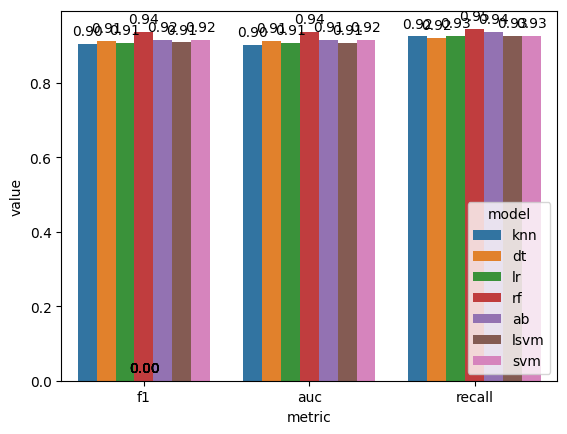

In [ ]:
# zpracování posbíraných výsledků list -> do pandas dataframu
results_df = pd.DataFrame.from_records(results)

# vykreslení výsledků jako bar chart pro různé metriky a modely
ax = sns.barplot(x='metric', y='value', hue='model', data=results_df)
# přidání hodnot nad sloupce
for p in ax.patches:
  ax.annotate(
      format(p.get_height(), '.2f'),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha = 'center',
      va = 'center',
      xytext = (0, 9),
      textcoords = 'offset points')

plt.show()

Analýza významu featur
- podle decision tree nebo logistické regrese najít nejlepší prediktory
- vzít všechny feratury, nebo jenom nějaké, ...

In [ ]:
# thety od featur -> čím větší tím lepší prediktor
abs(pd.DataFrame(nejlepsi_modely["lr"].coef_, columns=X.columns)).T.sort_values(0, ascending=False)

,0
previous_loan_defaults_on_file,12.17
loan_percent_income,10.78
person_age,6.21
loan_int_rate,5.62
person_emp_exp,5.43
loan_amnt,5.36
VENTURE,3.10
person_income,3.00
credit_score,2.74
PERSONAL,2.62


In [ ]:
# nejlépe se jeví random forest -> predikce pro test data
y_pred_rf = nejlepsi_modely["rf"].predict(X_test)

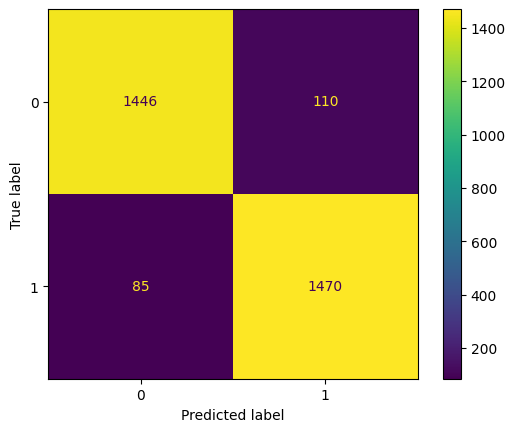

In [ ]:
# confusion matice pro predikce nejlepšího rf modelu
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# predikce jako surový výstup - desetinná čísla pro kreslení ROC grafu
# .predict_proba -> predikce
# přetypujeme na dataframe
# vzít sloupec s predikcemi '[1]'
y_pred_rf_proba = pd.DataFrame(nejlepsi_modely["rf"].predict_proba(X_test))[1]

In [ ]:
# napočítání false a true positive rate -> pro ROC křivku
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)

In [ ]:
# vygenerování výstupu náhodného modelu pro porovnání
help_prob = [0 for _ in range(len(y_test))]
help_fpr, help_tpr, _ = roc_curve(y_test, help_prob)

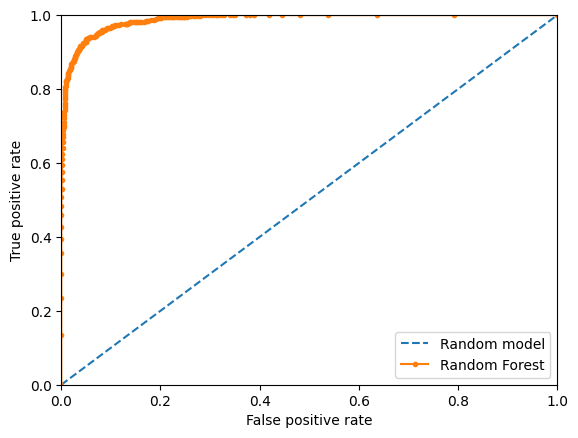

In [ ]:
# Vykreslení grafů náhodného a random forest modelu
plt.plot(help_fpr, help_tpr, linestyle='--', label='Random model')
plt.plot(fpr, tpr, marker='.', label='Random Forest')

# nastavení limitů -> ROC křivka je v rozmezí 0 - 1 v obou osách
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Anotace
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### Lazy predict

In [ ]:
# inicializace lazy prediktoru
lp = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# natrénování lazy predict -> ve smyčce vyzkouší všechny modely
models, predictions = lp.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 31/32 [00:17<00:00,  2.98it/s]

[LightGBM] [Info] Number of positive: 1781, number of negative: 6219
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222625 -> initscore=-1.250434
[LightGBM] [Info] Start training from score -1.250434


100%|██████████| 32/32 [00:18<00:00,  1.78it/s]


In [ ]:
# výsledky lazy predict
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.92,0.87,0.87,0.92,0.27
SGDClassifier,0.88,0.86,0.86,0.89,0.13
RandomForestClassifier,0.92,0.85,0.85,0.92,1.18
AdaBoostClassifier,0.90,0.85,0.85,0.90,0.73
LinearDiscriminantAnalysis,0.89,0.85,0.85,0.89,0.08
BaggingClassifier,0.91,0.85,0.85,0.91,0.29
LinearSVC,0.89,0.85,0.85,0.89,0.11
LogisticRegression,0.89,0.85,0.85,0.89,0.05
SVC,0.91,0.84,0.84,0.90,1.38


# Přístup po jednom - old

### KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_parameters = {'n_neighbors':(3, 5, 7, 9), 'weights':["uniform", "distance"]}

In [ ]:
gs = GridSearchCV(knn_model, knn_parameters)
gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 5, 7, 9),
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_model = gs.best_estimator_
y_knn = knn_model.predict(X_test)

In [ ]:
results.append({"metric": "f1", "model": "knn", "value": f1_score(y_test, y_knn)})
results.append({"metric": "auc", "model": "knn", "value": roc_auc_score(y_test, y_knn)})
results.append({"metric": "recall", "model": "knn", "value": recall_score(y_test, y_knn)})

### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_parameters = {'splitter':("best", "random"), 'max_features':(None, "sqrt"), 'criterion':["gini", "entropy"]}

In [ ]:
gs = GridSearchCV(dt_model, dt_parameters)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': (None, 'sqrt'),
                         'splitter': ('best', 'random')})

In [ ]:
dt_model = gs.best_estimator_
y_dt = dt_model.predict(X_test)

In [ ]:
results.append({"metric": "f1", "model": "dt", "value": f1_score(y_test, y_dt)})
results.append({"metric": "auc", "model": "dt", "value": roc_auc_score(y_test, y_dt)})
results.append({"metric": "recall", "model": "dt", "value": recall_score(y_test, y_dt)})

### Logistická regrese

In [ ]:
lr_model = LogisticRegression()
lr_parameters = {'penalty':(None, "l1", "l2"), 'C':(0.1, 1, 10), 'solver':["liblinear", "lbfgs"]}

In [ ]:
gs = GridSearchCV(lr_model, lr_parameters)
gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': (0.1, 1, 10), 'penalty': (None, 'l1', 'l2'),
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
lr_model = gs.best_estimator_
y_lr = lr_model.predict(X_test)

In [ ]:
results.append({"metric": "f1", "model": "lr", "value": f1_score(y_test, y_lr)})
results.append({"metric": "auc", "model": "lr", "value": roc_auc_score(y_test, y_lr)})
results.append({"metric": "recall", "model": "lr", "value": recall_score(y_test, y_lr)})

### Porovnání modelů / variant modelů mezi sebou

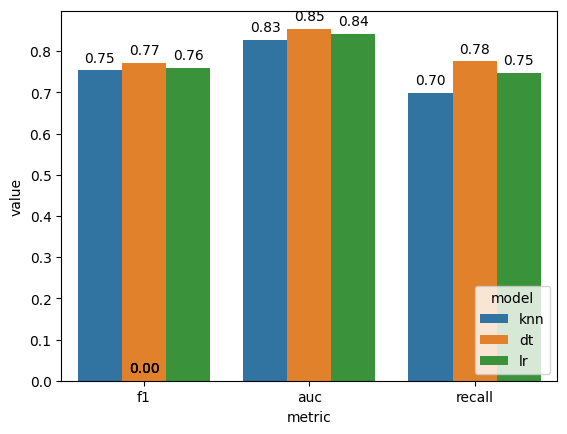

In [ ]:
results_df = pd.DataFrame.from_records(results)
#sns.barplot(x='metric', y='value', hue='model', data=results_df)

ax = sns.barplot(x='metric', y='value', hue='model', data=results_df)
# Přidání hodnot nad sloupce for
for p in ax.patches:
  ax.annotate(
      format(p.get_height(), '.2f'),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha = 'center',
      va = 'center',
      xytext = (0, 9),
      textcoords = 'offset points')

plt.show()

Analýza významu featur
- podle decision tree nebo logistické regrese najít nejlepší prediktory
- vzít všechny feratury, nebo jenom nějaké, ...

In [ ]:
# thety od featur -> čím větší tím lepší prediktor
abs(pd.DataFrame(lr_model.coef_, columns=X.columns)).T.sort_values(0, ascending=False)

,0
loan_percent_income,10.648689
previous_loan_defaults_on_file,9.879486
loan_int_rate,4.850749
person_income,4.131568
loan_amnt,3.591177
credit_score,3.582686
OWN,1.368323
VENTURE,1.259228
person_age,1.060354
EDUCATION,0.939831
